In [7]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
import cv2

maxHist = 3000

In [49]:
def linearTrans(img, alpha, beta, dmin=0, dmax=255):
    return np.uint8(np.clip(alpha*img + beta, dmin, dmax-1))

def linearGradient(img, dmin=0, dmax=255):
    pattern = np.transpose(np.array([np.arange(img.shape[0])]).repeat(img.shape[1],0)/img.shape[0])
    pattern = np.flip(pattern)
    return np.uint8(np.clip(pattern*img, dmin, dmax-1))

def blend(img1, img2, alpha, dmin=0, dmax=255):
    return np.uint8(np.clip((1.0-alpha)*img1 + alpha*img2, dmin, dmax-1))

def linearBlend(img1, img2, dmin=0, dmax=255):
    pattern = np.array([np.arange(img.shape[1])]).repeat(img.shape[0],0)/img.shape[1]
    return np.uint8(np.clip((-pattern+1)*img1 + pattern*img2, dmin, dmax-1))

def gammaCorrection(img, gamma, dmin=0, dmax=255):
    return np.uint8(np.clip(((img/dmax)**(1.0/gamma))*dmax, dmin, dmax-1))

def negative(img, dmin=0, dmax=255):
    return np.uint8(np.clip(-img+dmax, dmin, dmax-1))

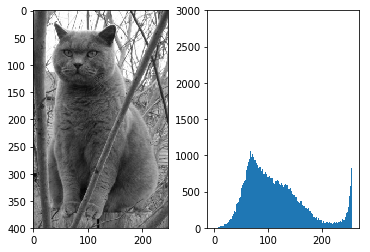

In [3]:
img = cv2.imread('cat.jpg', 0)
img2 = cv2.imread('dog.jpg', 0)
plt.subplot(1, 2, 1)
plt.imshow(img, cmap = 'gray')
axes = plt.subplot(1, 2, 2)
plt.hist(img.ravel(),256,[0,256]);
axes.set_ylim([0, maxHist])
plt.show()

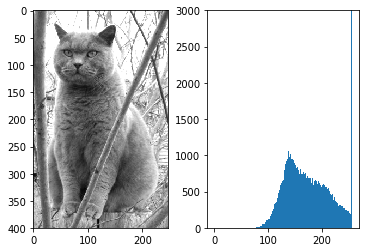

In [4]:
alpha = 1.0
beta = 70.0
img1 = linearTrans(img, alpha, beta)
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap = 'gray')
axes = plt.subplot(1, 2, 2)
plt.hist(img1.ravel(),256,[0,256]);
axes.set_ylim([0, maxHist])
plt.show()

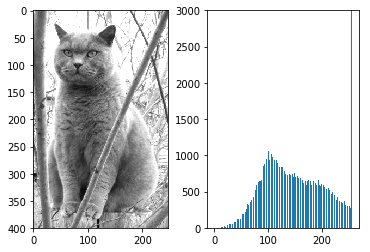

In [5]:
alpha = 1.5
beta = 0.0
img1 = linearTrans(img, alpha, beta)
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap = 'gray')
axes = plt.subplot(1, 2, 2)
plt.hist(img1.ravel(),256,[0,256]);
axes.set_ylim([0, maxHist])
plt.show()

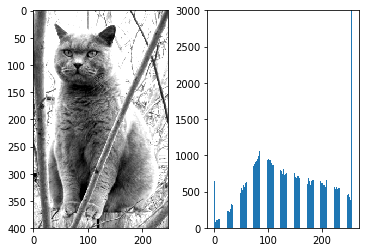

In [6]:
alpha = 2.0
beta = -50.0
img1 = linearTrans(img, alpha, beta)
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap = 'gray')
axes = plt.subplot(1, 2, 2)
plt.hist(img1.ravel(),256,[0,256]);
axes.set_ylim([0, maxHist])
plt.show()

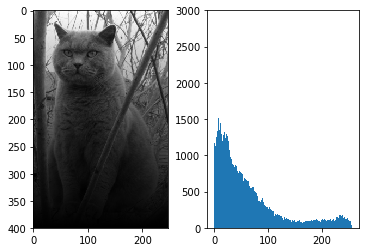

In [13]:
alpha = 2.0
beta = -50.0
img1 = linearGradient(img)
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap = 'gray')
axes = plt.subplot(1, 2, 2)
plt.hist(img1.ravel(),256,[0,256]);
axes.set_ylim([0, maxHist])
plt.show()

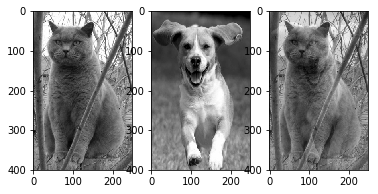

In [31]:
alpha = 0.25
img_out = blend(img, img2, alpha)
plt.subplot(1, 3, 1)
plt.imshow(img, cmap = 'gray')
plt.subplot(1, 3, 2)
plt.imshow(img2, cmap = 'gray')
plt.subplot(1, 3, 3)
plt.imshow(img_out, cmap = 'gray')
plt.show()

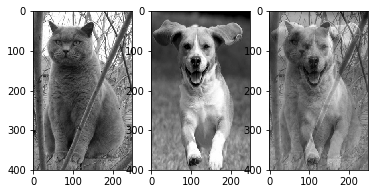

In [32]:
alpha = 0.5
img_out = blend(img, img2, alpha)
plt.subplot(1, 3, 1)
plt.imshow(img, cmap = 'gray')
plt.subplot(1, 3, 2)
plt.imshow(img2, cmap = 'gray')
plt.subplot(1, 3, 3)
plt.imshow(img_out, cmap = 'gray')
plt.show()

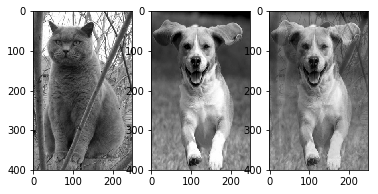

In [33]:
alpha = 0.75
img_out = blend(img, img2, alpha)
plt.subplot(1, 3, 1)
plt.imshow(img, cmap = 'gray')
plt.subplot(1, 3, 2)
plt.imshow(img2, cmap = 'gray')
plt.subplot(1, 3, 3)
plt.imshow(img_out, cmap = 'gray')
plt.show()

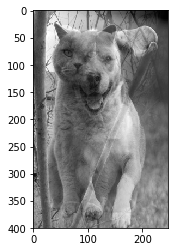

In [38]:
img_out = linearBlend(img, img2)
plt.subplot(1, 1, 1)
plt.imshow(img_out, cmap = 'gray')
plt.show()

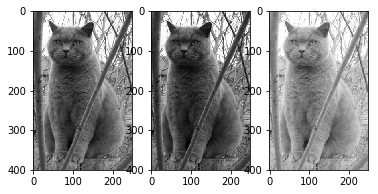

In [46]:
plt.subplot(1, 3, 1)
plt.imshow(gammaCorrection(img, 1.0), cmap = 'gray')
plt.subplot(1, 3, 2)
plt.imshow(gammaCorrection(img, 0.8), cmap = 'gray')
plt.subplot(1, 3, 3)
plt.imshow(gammaCorrection(img, 2.2), cmap = 'gray')
plt.show()

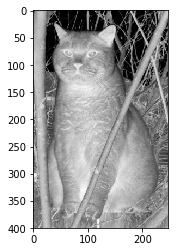

In [50]:
img_out = negative(img)
plt.subplot(1, 1, 1)
plt.imshow(img_out, cmap = 'gray')
plt.show()

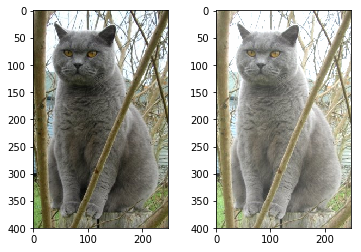

In [52]:
img_rgb = cv2.imread('cat.jpg')
plt.subplot(1, 2, 1)
plt.imshow(img_rgb[...,::-1])
plt.subplot(1, 2, 2)
plt.imshow(linearTrans(img_rgb, 1.0, 50)[...,::-1])
plt.show()